In [79]:
# import libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import category_encoders as ce

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier,StackingClassifier
import xgboost as xgb

from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve,cohen_kappa_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score 

#### Load the dataset

In [80]:
x = pd.read_csv("train.csv")
y = pd.read_csv("test.csv")

In [81]:
print(x.shape,y.shape)

(54808, 13) (23490, 12)


#### Combine the dataset

In [82]:
data = pd.concat([x,y])

#### Analyzing the final dataset

In [83]:
data.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0.0


In [84]:
data.shape

(78298, 13)

In [85]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,78298.0,39149.500000,22602.830026,1.0,19575.25,39149.5,58723.75,78298.0
no_of_trainings,78298.0,1.253378,0.606766,1.0,1.00,1.0,1.00,10.0
age,78298.0,34.797619,7.665928,20.0,29.00,33.0,39.00,60.0
previous_year_rating,72362.0,3.332219,1.260982,1.0,3.00,3.0,4.00,5.0
length_of_service,78298.0,5.848974,4.248070,1.0,3.00,5.0,7.00,37.0
awards_won?,78298.0,0.023053,0.150073,0.0,0.00,0.0,0.00,1.0
avg_training_score,78298.0,63.349664,13.383664,39.0,51.00,60.0,76.00,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.00,1.0


In [86]:
data.nunique()

employee_id             78298
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

In [87]:
data.describe(include='object').T

,count,unique,top,freq
department,78298,9,Sales & Marketing,24155
region,78298,34,region_2,17642
education,74855,3,Bachelor's,52247
gender,78298,2,m,55092
recruitment_channel,78298,3,other,43524


In [88]:
data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won?               int64
avg_training_score        int64
is_promoted             float64
dtype: object

#### Dividing the dataset into category and numerical columns.

In [89]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score',
       'is_promoted'],
      dtype='object')

In [90]:
for i in data.columns:
    print(f'{i}:\n{data[i].value_counts()}\n')

employee_id:
65438    1
30254    1
5278     1
19976    1
74405    1
        ..
74473    1
34077    1
71531    1
7803     1
5973     1
Name: employee_id, Length: 78298, dtype: int64

department:
Sales & Marketing    24155
Operations           16112
Procurement          10158
Technology           10149
Analytics             7671
Finance               3627
HR                    3503
Legal                 1484
R&D                   1439
Name: department, dtype: int64

region:
region_2     17642
region_22     9167
region_7      6825
region_15     3938
region_13     3815
region_26     3271
region_31     2779
region_4      2478
region_27     2369
region_16     2055
region_28     1913
region_11     1886
region_23     1691
region_29     1408
region_32     1378
region_19     1284
region_14     1177
region_20     1176
region_17     1157
region_25     1156
region_5      1108
region_6       988
region_30      930
region_8       924
region_10      917
region_1       848
region_24      727
region_12 

In [91]:
# From the above distribution of data we can see that employee id is column with all unique values,thus
# it would be of not much use in analysis and model buliding.
# Drop irrelevant column
data.drop(columns='employee_id',inplace=True)

In [92]:
cat_cols = ['department', 'region', 'education', 'gender','recruitment_channel', 'no_of_trainings',
           'previous_year_rating', 'awards_won?','is_promoted']
num_cols = ['age','length_of_service', 'avg_training_score',]
           

### Data visualization

#### Univariate analysis

In [93]:
len(cat_cols)

9

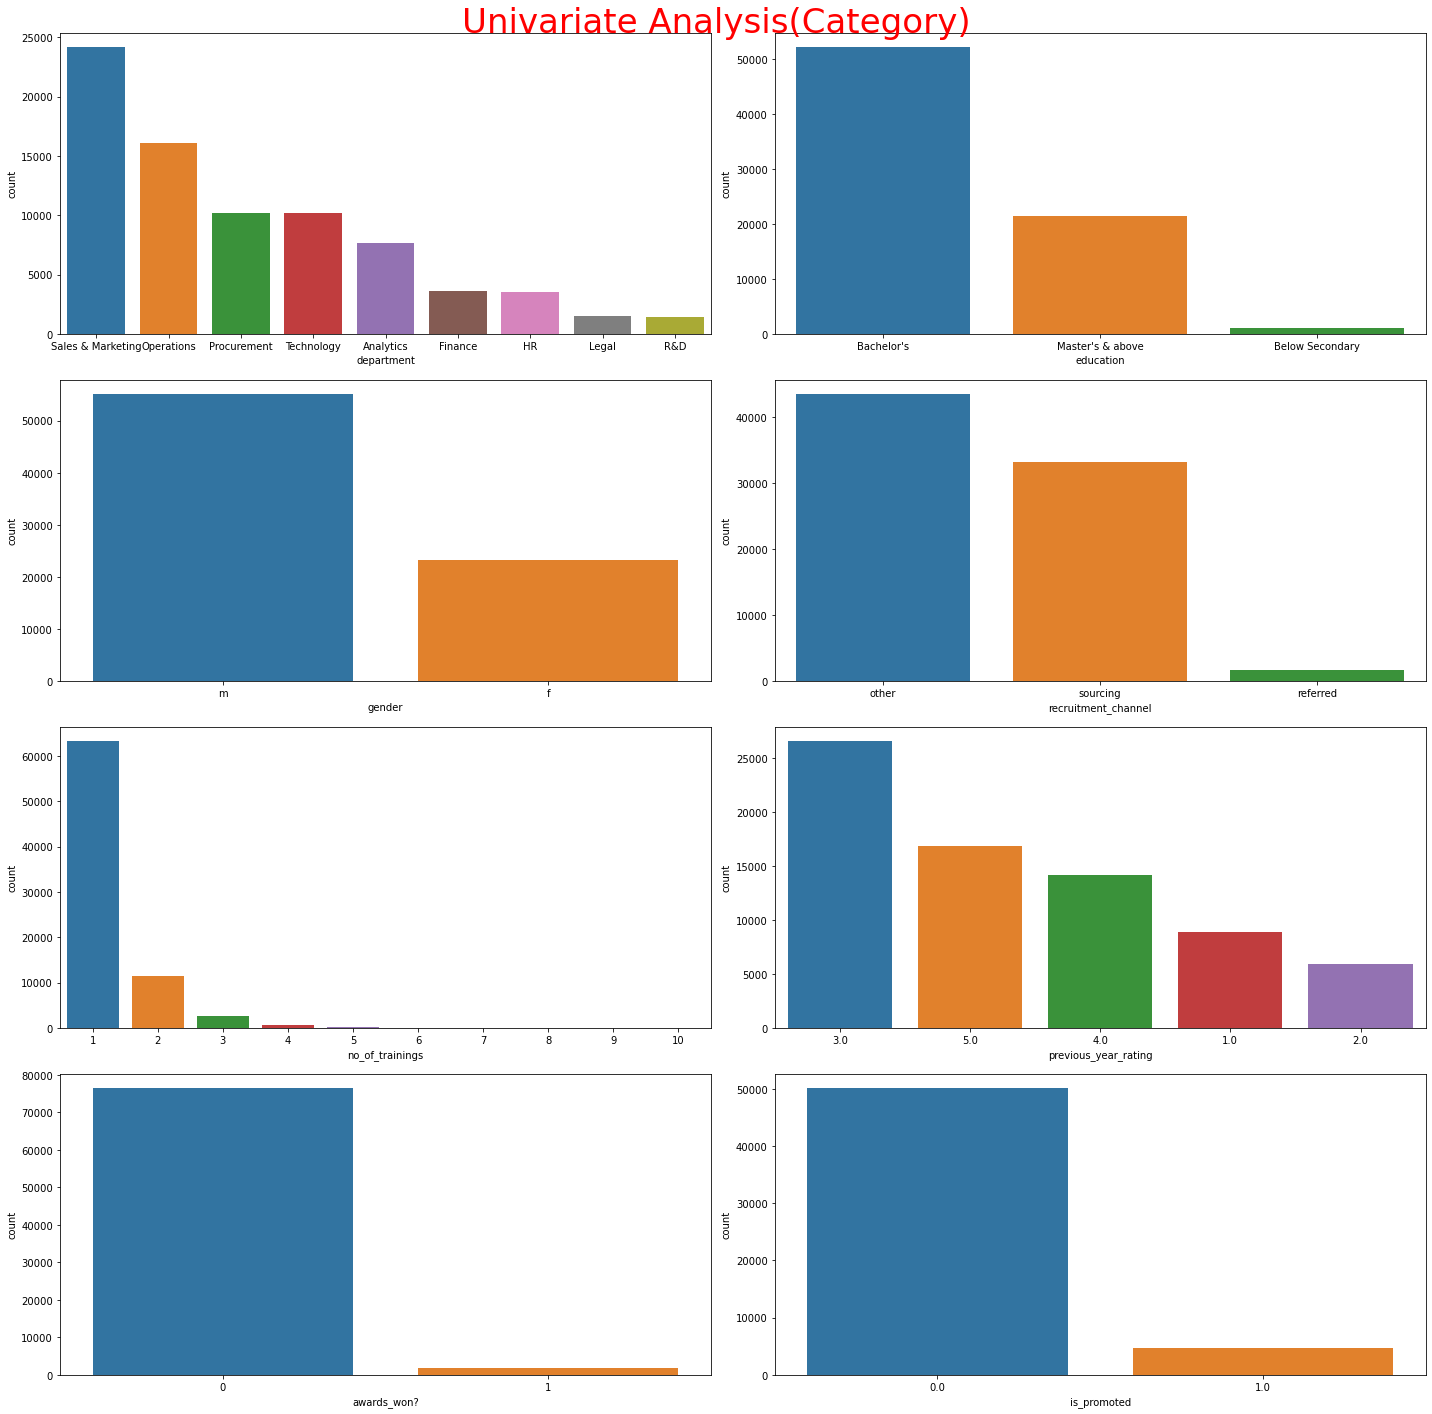

In [94]:
# Category columns
cat_cols0=['department','education', 'gender','recruitment_channel', 'no_of_trainings',
           'previous_year_rating', 'awards_won?','is_promoted']
t=1
plt.figure(figsize=(20,20))
plt.suptitle('Univariate Analysis(Category)',size = 34,color ="red")
for i in cat_cols0:
    plt.subplot(4,2,t)
    sns.countplot(x=data[i],order=data[i].value_counts().index)
    t+=1
plt.tight_layout()
plt.show()
    

#### Inferences:
- Department
 - sales & marketing team have most number of employees and R&D team have least number of employees.

- Education
 - Most employees have just Bachelor's Degree.
 
- Gender
 - Males are in majority.
 
- Recritment_channel
 - Primary source of recruiting is other sources.
 
- Num of trainings
 - Most employees have 1 training experience.
 
- Previous_year_rating
 - Majority have 3 ratings.
 
- Awards_won
 - Very few have won awards.
 
- Is_promoted(target variable)
 - Very few are selected for promotion

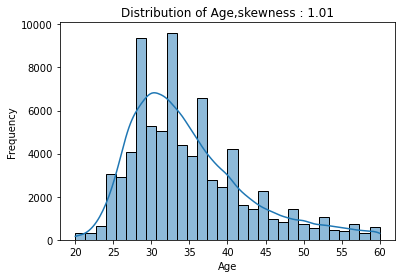

In [95]:
# Num_cols
sns.histplot(data['age'], kde=True, bins=30)
plt.title(f'Distribution of Age,skewness : {round(data["age"].skew(),2)}')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

- We can see that the data is positively skewed
- Most of the employees is between age of 28 and 34.

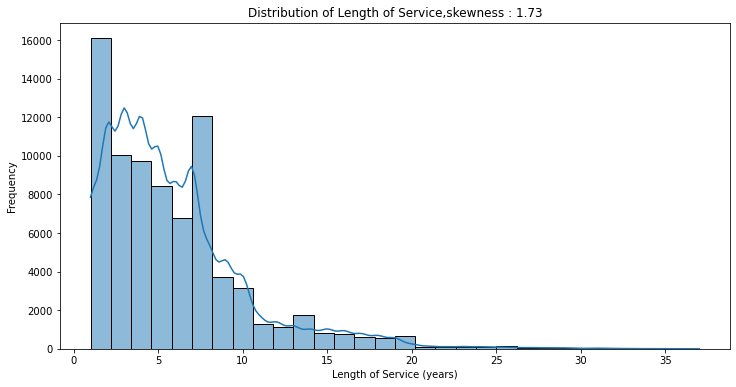

In [96]:
# Length of Service
plt.figure(figsize=(12, 6))
sns.histplot(data['length_of_service'], kde=True, bins=30)
plt.title(f'Distribution of Length of Service,skewness : {round(data["length_of_service"].skew(),2)}')
plt.xlabel('Length of Service (years)')
plt.ylabel('Frequency')
plt.show()

- Data is highly postively skewed
- Mostly there are newly hired employees.

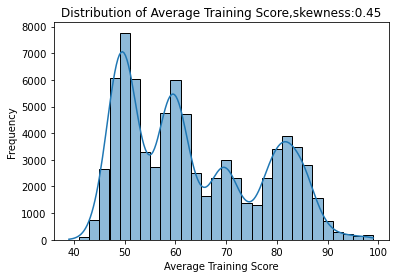

In [97]:
# Histogram of average training score
sns.histplot(data['avg_training_score'], kde=True, bins=30)
plt.title(f'Distribution of Average Training Score,skewness:{round(data["avg_training_score"].skew(),2)}')
plt.xlabel('Average Training Score')
plt.ylabel('Frequency')
plt.show()


- Data is normally distributred.

### Bivariate analysis

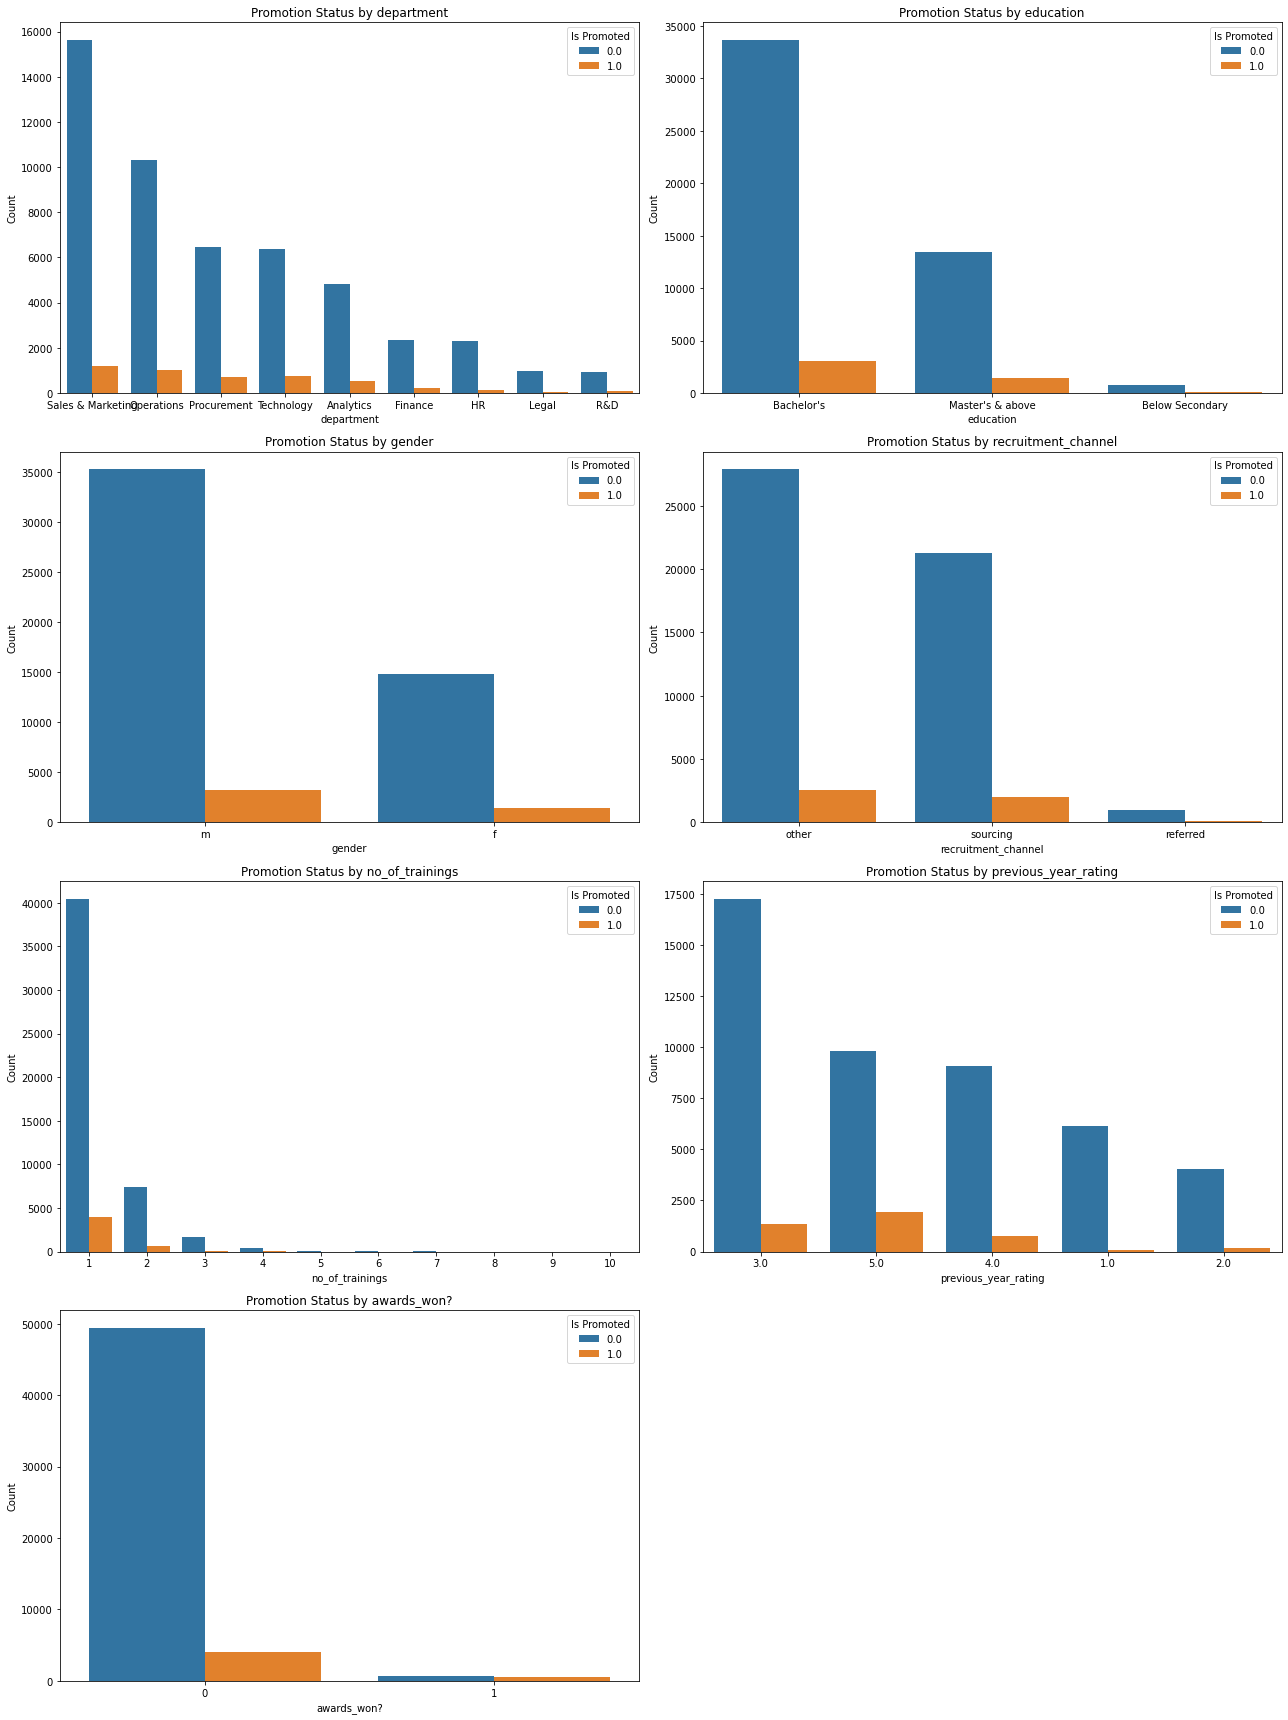

In [98]:
plt.figure(figsize=(18,24))
t=1
for i in cat_cols0:
    if i != 'is_promoted':
        plt.subplot(4,2,t)
        sns.countplot(x=i, hue='is_promoted', data=data,order = data[i].value_counts().index)
        plt.title(f'Promotion Status by {i}')
        plt.xlabel(i)
        plt.ylabel('Count')
        plt.legend(title='Is Promoted')
        t+=1
plt.tight_layout()
plt.show()

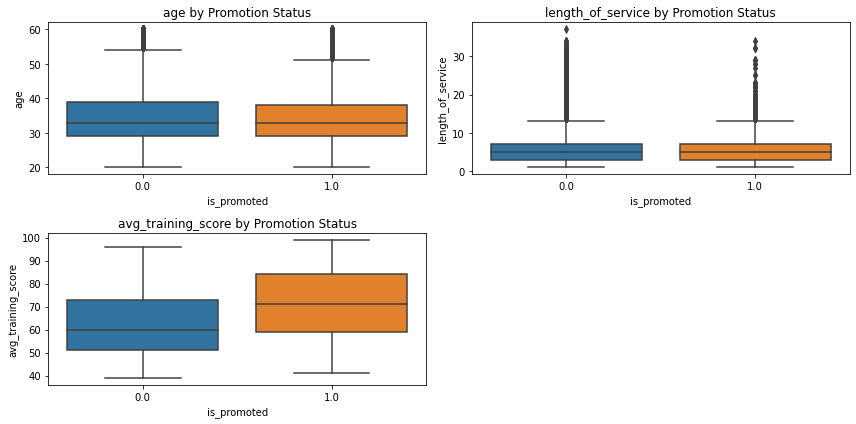

In [99]:
# Num vs Cat
t=1
plt.figure(figsize=(12, 6))
for i in num_cols:
    plt.subplot(2,2,t)
    sns.boxplot(y=i, x='is_promoted', data=data)
    plt.title(f'{i} by Promotion Status')
    plt.ylabel(i)
    plt.xlabel('is_promoted')
    t+=1
plt.tight_layout()
plt.show()


- We can see presence of outliers clearly in the dataset(age,lenth_of_service).
- Not much effect of age,length_of_service in promotion.
- Training has good impact on promotion and the most chances for promotion is for employees havinf training score approx 70.

### Treating defects in the dataset.

##### Null values treatment

In [100]:
# Null values treatment
round((data.isnull().sum()/data.shape[0])*100,2)
# percent of null values in each column

department               0.00
region                   0.00
education                4.40
gender                   0.00
recruitment_channel      0.00
no_of_trainings          0.00
age                      0.00
previous_year_rating     7.58
length_of_service        0.00
awards_won?              0.00
avg_training_score       0.00
is_promoted             30.00
dtype: float64

In [101]:
# Null values treatment
data.isnull().sum()
# number of null rows

department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

In [102]:
y.shape # it defines the null values in column 'is_promoted'

(23490, 12)

<AxesSubplot:xlabel='length_of_service', ylabel='previous_year_rating'>

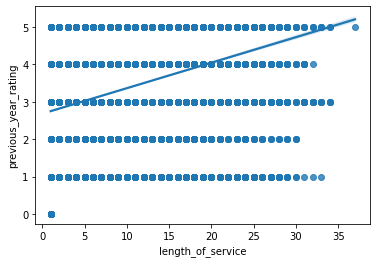

In [103]:
# Treating null values in previous year rating column.
sns.regplot(y=data['previous_year_rating'].fillna(0),x=data['length_of_service'])

In [104]:
# From this we can see that the null values is only in column of freshers cause they are new joinee
# so,company have no previous year rating for them so let's impute it with 0.

In [105]:
data['previous_year_rating'].fillna(0,inplace=True)

<AxesSubplot:xlabel='education'>

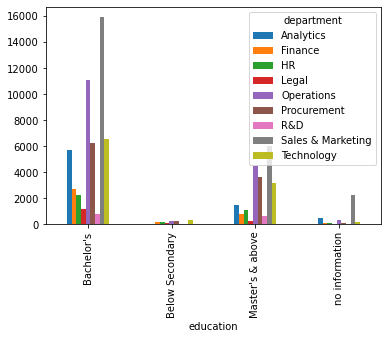

In [106]:
# Treating null values in education column.
pd.crosstab(index=data['education'].fillna('no information'),columns=data['department']).plot(kind='bar')
# As we can see null values for education column is in each dept so, we can assume these values are left 
# by mistake while filing.
# since it is categorical column we cannot use mean to fill null and median won't make much sense so,let,
# fill null values with mode.

In [107]:
data['education'].fillna(data['education'].mode()[0],inplace=True)

In [108]:
data['education'].mode()

0    Bachelor's
Name: education, dtype: object

##### Outlier treatment

In [109]:
data.shape

(78298, 12)

In [110]:
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers
u=data[data['age'] > upper_bound].shape[0]
l=data[data['age'] < lower_bound].shape[0]
print(f'Total number of outliers in age:{u+l}')


Total number of outliers in age:2062


In [111]:
Q1 = data['length_of_service'].quantile(0.25)
Q3 = data['length_of_service'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers
u=data[data['length_of_service'] > upper_bound].shape[0]
l=data[data['length_of_service'] < lower_bound].shape[0]
print(f'Total number of outliers in length of service:{u+l}')


Total number of outliers in length of service:4974


In [112]:
# let's first try model with outliers,cause in promotion age and length of service plays crucial role.

<AxesSubplot:xlabel='age', ylabel='length_of_service'>

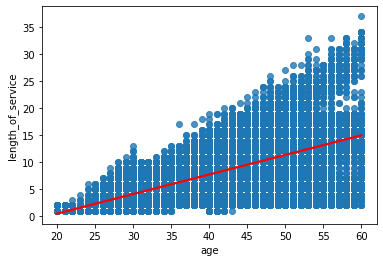

In [113]:
sns.regplot(x=data['age'],y=data['length_of_service'],line_kws={'color':'red'})

In [114]:
# we can see age is directly proportional to length of service

<AxesSubplot:>

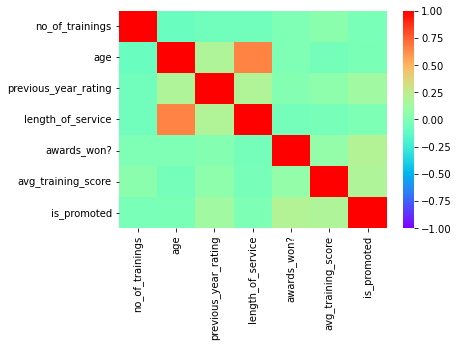

In [115]:
sns.heatmap(data.corr(),vmin=-1,vmax=1,cmap='rainbow')

In [116]:
data.head(3)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0.0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0.0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0.0


#### Encoding

In [117]:
# Ordinal Encoding for education
education_order = ["Below Secondary", "Bachelor's", "Master's & above"]
ordinal_encoder = OrdinalEncoder(categories=[education_order])
data['education'] = ordinal_encoder.fit_transform(data[['education']])

# Label Encoding for previous_year_rating
le = LabelEncoder()
data['previous_year_rating'] = le.fit_transform(data['previous_year_rating'])

# One-Hot Encoding for nominal variables
data = pd.get_dummies(data, columns=['department', 'gender', 'recruitment_channel'], drop_first=True)

# Binary Encoding for high cardinality variable
binary_encoder = ce.BinaryEncoder(cols=['region'])
data = binary_encoder.fit_transform(data)

# Check the final DataFrame
data.head()



,region_0,region_1,region_2,region_3,region_4,region_5,education,no_of_trainings,age,previous_year_rating,...,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,0,0,0,0,0,1,2.0,1,35,5,...,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,1,0,1.0,1,30,5,...,0,0,1,0,0,0,0,1,0,0
2,0,0,0,0,1,1,1.0,1,34,3,...,0,0,0,0,0,1,0,1,0,1
3,0,0,0,1,0,0,1.0,2,39,1,...,0,0,0,0,0,1,0,1,0,0
4,0,0,0,1,0,1,1.0,1,45,3,...,0,0,0,0,0,0,1,1,0,0


#### Split the dataset into it's original train and test format

In [118]:
train_new = data[data['is_promoted'].notnull()]
test_new = data[data['is_promoted'].isnull()]

In [119]:
# Let's split train_new into dependent and independent variable
x_n = train_new.drop(columns='is_promoted')
y_n = train_new['is_promoted']

In [120]:
# Let's apply train test split
x_train,x_test,y_train,y_test = train_test_split(x_n,y_n,train_size=0.7,random_state=2)

In [121]:
# Let's check for data imbalance in target column.
y_train.value_counts(normalize=True)

0.0    0.915027
1.0    0.084973
Name: is_promoted, dtype: float64

In [122]:
# Let's treat the imbalance of data using Synthetic Minority Over-sampling Technique (SMOTE)

In [123]:
from imblearn.over_sampling import SMOTE

In [124]:
sm = SMOTE(sampling_strategy=0.666)

In [125]:
x_train_new,y_train_new = sm.fit_resample(x_train,y_train)

In [126]:
y_train_new.value_counts(normalize=True)

0.0    0.60025
1.0    0.39975
Name: is_promoted, dtype: float64

#### MODEL 

In [127]:
import statsmodels.api as sma

In [128]:
model = sma.Logit(y_train_new,sma.add_constant(x_train_new)).fit()

Optimization terminated successfully.
         Current function value: 0.442812
         Iterations 7


In [129]:
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_promoted   No. Observations:                58484
Model:                          Logit   Df Residuals:                    58459
Method:                           MLE   Df Model:                           24
Date:                Thu, 13 Jun 2024   Pseudo R-squ.:                  0.3419
Time:                        23:12:27   Log-Likelihood:                -25897.
converged:                       True   LL-Null:                       -39354.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.6365      0.129     12.703      0.000       1.384       1.889
region_0                        -3.4835      0.168    -20.692      0.000      -3.813      -3.154
region_1                        -1.0808      0.030    -36.218      0.000      -1.139      -1.022
region_2                        -1.2762      0.031    -41.569      0.000      -1.336      -1.216
region_3                        -1.0204      0.023    -44.243      0.000      -1.066      -0.975
region_4                        -1.0539      0.025    -41.765      0.000      -1.103      -1.004
region_5                        -1.2047      0.027    -44.996      0.000      -1.257      -1.152
education                        0.1959      0.026      7.423      0.000       0.144       0.248
no_of_trainings                 -1.0426      0.029    -35.713      0.000      -1.100      -0.985
age                             -0.0225      0.002    -10.796      0.000      -0.027      -0.018
previous_year_rating             0.2571      0.008     32.723      0.000       0.242       0.272
length_of_service               -0.0269      0.004     -7.587      0.000      -0.034      -0.020
awards_won?                      1.1037      0.073     15.074      0.000       0.960       1.247
avg_training_score               0.0383      0.001     28.317      0.000       0.036       0.041
department_Finance              -1.9473      0.074    -26.259      0.000      -2.093      -1.802
department_HR                   -2.3117      0.092    -25.007      0.000      -2.493      -2.131
department_Legal                -2.7560      0.142    -19.430      0.000      -3.034      -2.478
department_Operations           -1.2510      0.041    -30.642      0.000      -1.331      -1.171
department_Procurement          -1.5487      0.041    -38.009      0.000      -1.629      -1.469
department_R&D                  -2.9424      0.115    -25.549      0.000      -3.168      -2.717
department_Sales & Marketing    -0.6702      0.047    -14.294      0.000      -0.762      -0.578
department_Technology           -1.6697      0.038    -43.493      0.000      -1.745      -1.594
gender_m                        -0.7138      0.024    -30.147      0.000      -0.760      -0.667
recruitment_channel_referred    -1.7985      0.107    -16.808      0.000      -2.008      -1.589
recruitment_channel_sourcing    -0.7517      0.023    -32.019      0.000      -0.798      -0.706
================================================================================================
"""

In [130]:
y_softpred = model.predict(sma.add_constant(x_test))
y_hardpred = (y_softpred>0.5).astype(int)

In [131]:
confusion_matrix(y_test,y_hardpred)

array([[13003,  2032],
       [  990,   418]], dtype=int64)

In [132]:
print(classification_report(y_test,y_hardpred))

              precision    recall  f1-score   support

         0.0       0.93      0.86      0.90     15035
         1.0       0.17      0.30      0.22      1408

    accuracy                           0.82     16443
   macro avg       0.55      0.58      0.56     16443
weighted avg       0.86      0.82      0.84     16443



In [133]:
mod=[]
accu=[]
prec=[]
rec=[]
f1=[]
kappa=[]

def model_validation(model,xtrain,ytrain,xtest,ytest):
    m=model
    m.fit(xtrain,ytrain)
    pred_h=m.predict(xtest)
    pred_s=m.predict_proba(xtest)[:,1]
    
    print(f'Confusion Matrix\n {confusion_matrix(ytest,pred_h)}')
    print(f'Classification Report\n {classification_report(ytest,pred_h)}')
    
    fpr,tpr,thresh=roc_curve(ytest,pred_s)
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],ls='--',color='red')
    plt.title(f'ROC AUC: {round(roc_auc_score(ytest,pred_s),2)}')
    plt.show()
    
    response=input('Do you want to save the model Y/N?')
    
    if response.lower()=='y':
        
        global scorecard
        mod.append(str(model))
        accu.append(accuracy_score(ytest,pred_h))
        rec.append(recall_score(ytest,pred_h))
        prec.append(precision_score(ytest,pred_h))
        f1.append(f1_score(ytest,pred_h))
        kappa.append(cohen_kappa_score(ytest,pred_h))

        scorecard=pd.DataFrame({'Model':mod,
                                'Accuracy':accu,
                                'Precision':prec,
                                'Recall':rec,
                                'F1-Score':f1,
                                'Cohen-Kappa Score':kappa})
    else:
        return

Confusion Matrix
 [[13011  2024]
 [  989   419]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.93      0.87      0.90     15035
         1.0       0.17      0.30      0.22      1408

    accuracy                           0.82     16443
   macro avg       0.55      0.58      0.56     16443
weighted avg       0.86      0.82      0.84     16443



C:\Users\raj50\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


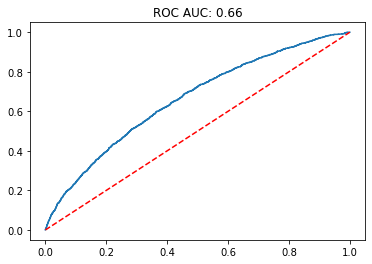

Do you want to save the model Y/N?y


In [134]:
model_validation(LogisticRegression(max_iter=500),x_train_new,y_train_new,x_test,y_test)

Confusion Matrix
 [[13503  1532]
 [  852   556]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.94      0.90      0.92     15035
         1.0       0.27      0.39      0.32      1408

    accuracy                           0.86     16443
   macro avg       0.60      0.65      0.62     16443
weighted avg       0.88      0.86      0.87     16443



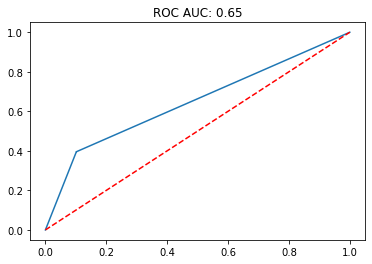

Do you want to save the model Y/N?y


In [135]:
model_validation(DecisionTreeClassifier(random_state=42),x_train_new,y_train_new,x_test,y_test)

Confusion Matrix
 [[13822  1213]
 [ 1053   355]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.93      0.92      0.92     15035
         1.0       0.23      0.25      0.24      1408

    accuracy                           0.86     16443
   macro avg       0.58      0.59      0.58     16443
weighted avg       0.87      0.86      0.87     16443



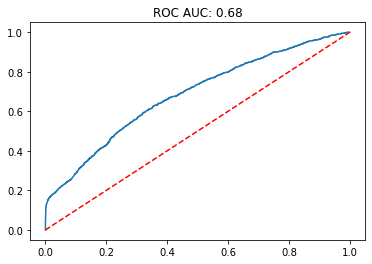

Do you want to save the model Y/N?y


In [136]:
model_validation(RandomForestClassifier(n_estimators=100,max_depth=5,max_features=8,random_state=42),x_train_new,y_train_new,x_test,y_test)

Confusion Matrix
 [[13631  1404]
 [  960   448]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.93      0.91      0.92     15035
         1.0       0.24      0.32      0.27      1408

    accuracy                           0.86     16443
   macro avg       0.59      0.61      0.60     16443
weighted avg       0.87      0.86      0.86     16443



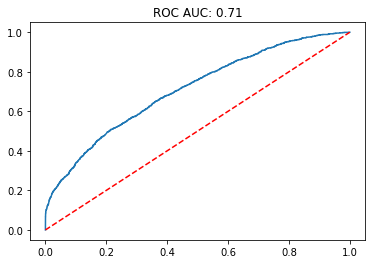

Do you want to save the model Y/N?y


In [137]:
model_validation(AdaBoostClassifier(n_estimators=100,random_state=42),x_train_new,y_train_new,x_test,y_test)

Confusion Matrix
 [[14315   720]
 [  821   587]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95     15035
         1.0       0.45      0.42      0.43      1408

    accuracy                           0.91     16443
   macro avg       0.70      0.68      0.69     16443
weighted avg       0.90      0.91      0.90     16443



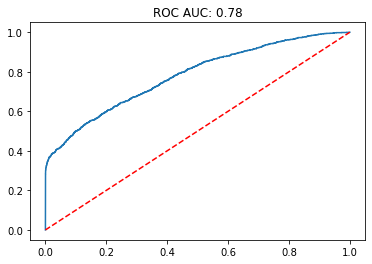

Do you want to save the model Y/N?y


In [138]:
model_validation(XGBClassifier(n_estimators=100,random_state=42),x_train_new,y_train_new,x_test,y_test)

Confusion Matrix
 [[14424   611]
 [  921   487]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.94      0.96      0.95     15035
         1.0       0.44      0.35      0.39      1408

    accuracy                           0.91     16443
   macro avg       0.69      0.65      0.67     16443
weighted avg       0.90      0.91      0.90     16443



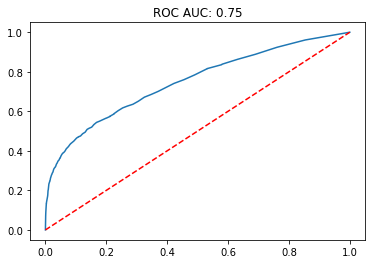

Do you want to save the model Y/N?y


In [139]:
model_validation(BaggingClassifier(n_estimators=100,random_state=42),x_train_new,y_train_new,x_test,y_test)

Confusion Matrix
 [[14315   720]
 [  821   587]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95     15035
         1.0       0.45      0.42      0.43      1408

    accuracy                           0.91     16443
   macro avg       0.70      0.68      0.69     16443
weighted avg       0.90      0.91      0.90     16443



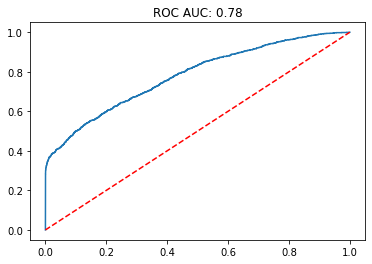

Do you want to save the model Y/N?y


In [140]:
model_validation(xgb.XGBClassifier(n_estimators=100,random_state=42),x_train_new,y_train_new,x_test,y_test)

In [141]:
from catboost import CatBoostClassifier
import lightgbm as lgb

Learning rate set to 0.483569
0:	learn: 0.5726077	total: 8.45ms	remaining: 836ms
1:	learn: 0.5112118	total: 16.2ms	remaining: 796ms
2:	learn: 0.4343769	total: 24.6ms	remaining: 794ms
3:	learn: 0.4195227	total: 32.4ms	remaining: 777ms
4:	learn: 0.3944070	total: 40.4ms	remaining: 768ms
5:	learn: 0.3703492	total: 48.7ms	remaining: 762ms
6:	learn: 0.3527286	total: 56.4ms	remaining: 749ms
7:	learn: 0.3486401	total: 64.1ms	remaining: 737ms
8:	learn: 0.3387961	total: 73.7ms	remaining: 745ms
9:	learn: 0.3328372	total: 82.7ms	remaining: 744ms
10:	learn: 0.3252388	total: 90.5ms	remaining: 732ms
11:	learn: 0.3199031	total: 98.3ms	remaining: 721ms
12:	learn: 0.3162189	total: 106ms	remaining: 708ms
13:	learn: 0.3130017	total: 113ms	remaining: 695ms
14:	learn: 0.3113677	total: 121ms	remaining: 686ms
15:	learn: 0.3087470	total: 129ms	remaining: 679ms
16:	learn: 0.3046570	total: 137ms	remaining: 670ms
17:	learn: 0.3021522	total: 145ms	remaining: 661ms
18:	learn: 0.3003029	total: 154ms	remaining: 658ms

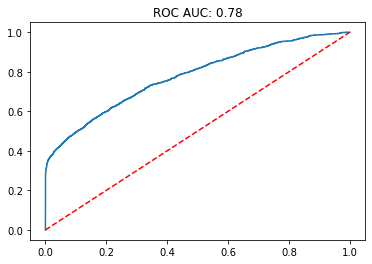

Do you want to save the model Y/N?y


In [142]:
model_validation(CatBoostClassifier(n_estimators=100,random_state=42,verbose=1),x_train_new,y_train_new,x_test,y_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 23379, number of negative: 35105
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002848 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 445
[LightGBM] [Info] Number of data points in the train set: 58484, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.399750 -> initscore=-0.406505
[LightGBM] [Info] Start training from score -0.406505
Confusion Matrix
 [[14398   637]
 [  827   581]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.95      0.96      0.95     15035
         1.0       0.48      0.41      0.44      1408

    accuracy                           0.91     16443
   macro avg       0.71      0.69      0.70     16443
weighted avg    

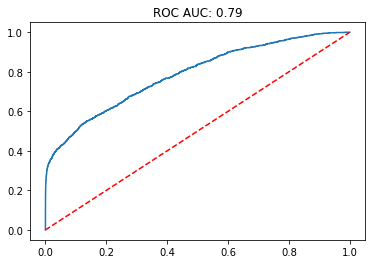

Do you want to save the model Y/N?y


In [143]:
model_validation(lgb.LGBMClassifier(n_estimators=100,random_state=42,verbose=1),x_train_new,y_train_new,x_test,y_test)

Confusion Matrix
 [[12134  2901]
 [  808   600]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.94      0.81      0.87     15035
         1.0       0.17      0.43      0.24      1408

    accuracy                           0.77     16443
   macro avg       0.55      0.62      0.56     16443
weighted avg       0.87      0.77      0.81     16443



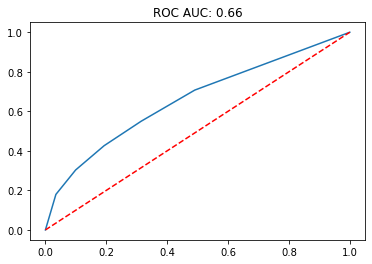

Do you want to save the model Y/N?y


In [144]:
model_validation(KNeighborsClassifier(n_neighbors=5),x_train_new,y_train_new,x_test,y_test)

In [145]:
scorecard

,Model,Accuracy,Precision,Recall,F1-Score,Cohen-Kappa Score
0,LogisticRegression(max_iter=500),0.816761,0.171510,0.297585,0.217606,0.122244
1,DecisionTreeClassifier(random_state=42),0.855014,0.266284,0.394886,0.318078,0.240380
2,"RandomForestClassifier(max_depth=5, max_featur...",0.862191,0.226403,0.252131,0.238575,0.163055
3,"AdaBoostClassifier(n_estimators=100, random_st...",0.856231,0.241901,0.318182,0.274847,0.196692
4,"XGBClassifier(base_score=None, booster=None, c...",0.906282,0.449120,0.416903,0.432413,0.381414
5,"BaggingClassifier(n_estimators=100, random_sta...",0.906830,0.443534,0.345881,0.388667,0.339074
6,"XGBClassifier(base_score=None, booster=None, c...",0.906282,0.449120,0.416903,0.432413,0.381414
7,<catboost.core.CatBoostClassifier object at 0x...,0.902147,0.429275,0.433239,0.431248,0.377717
8,"LGBMClassifier(random_state=42, verbose=1)",0.910965,0.477011,0.412642,0.442498,0.394393
9,KNeighborsClassifier(),0.774433,0.171380,0.426136,0.244449,0.139328
